In [232]:
# Using environments is a good practice to keep dependencies clean and ensure that anyone can recreate
# the exact same environment with the required packages.
# Create an environment call Week2
# !virtualenv Week2

created virtual environment CPython3.12.4.final.0-64 in 254ms
  creator CPython3Posix(dest=/home/jsancheg/Week2, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, via=copy, app_data_dir=/home/jsancheg/.local/share/virtualenv)
    added seed packages: pip==24.2
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [10]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression

In [11]:
url = "http://www.stats.gla.ac.uk/~tereza/rp/bollywood_boxoffice.csv"
bollywood = pd.read_csv(url, encoding = 'latin-1')
print(bollywood.head())


          Movie   Gross  Budget
0   Ek Villain    95.64    36.0
1   Humshakals    55.65    77.0
2      Holiday   110.01    90.0
3        Fugly    11.16    16.0
4  City Lights     5.19     9.5


Text(0.5, 1.0, 'Scatter Plot of Budget vs. Gross')

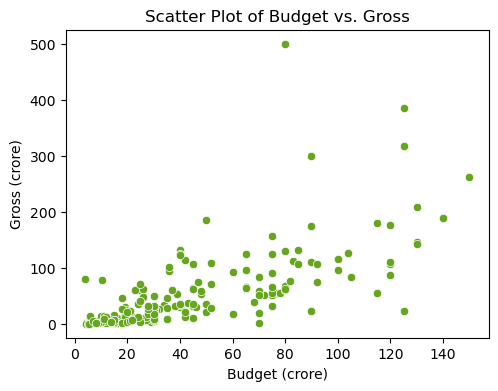

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Budget', y='Gross', data=bollywood, color='#66a61e')
plt.xlabel('Budget (crore)')
plt.ylabel('Gross (crore)')
plt.title('Scatter Plot of Budget vs. Gross')

Text(0.5, 1.0, 'Scatter Plot of log(Budget) vs. log(Gross)')

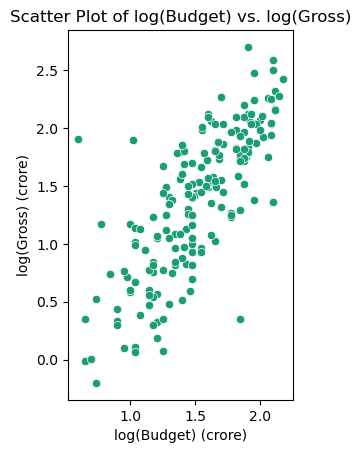

In [14]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=np.log10(bollywood['Budget']), y=np.log10(bollywood['Gross']), data=bollywood, color='#1b9e77')
plt.xlabel('log(Budget) (crore)')
plt.ylabel('log(Gross) (crore)')
plt.title('Scatter Plot of log(Budget) vs. log(Gross)')

In [20]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [18]:
X = bollywood[['Budget']]
y = bollywood['Gross']
model = LinearRegression().fit(np.log10(X), np.log10(y))

In [20]:
# Get the model's coefficients
coefficients = model.coef_

# Get the model's intercept
intercept = model.intercept_

# Get the R-squared score
r_squared = model.score(X, y)

In [22]:
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("R-squared:", r_squared)

Coefficients: [1.31954649]
Intercept: -0.6254860631814736
R-squared: 0.45755761898365


In [90]:
# Create scatter plot with regression line
plt.figure(figsize=(6, 4)) 

# Sort the data by Budget for smooth line plot
sorted_indices = np.argsort(np.log10(bollywood['Budget']))
sorted_budget = np.log10(bollywood['Budget'])[sorted_indices]
sorted_predicted = model.predict(np.log10(X))[sorted_indices]

sns.scatterplot(x=np.log10(bollywood['Budget']), y=np.log10(bollywood['Gross']),  color='#1b9e77')
plt.xlabel('log(Budget) (crore)')
plt.ylabel('log(Gross) (crore)')
plt.title('Scatter Plot of log(Budget) vs. log(Gross) with Regression Line')

#plt.plot(np.log10(bollywood['Budget']), model.predict(X), color='#e7298a')
plt.plot(sorted_budget, sorted_predicted, color = '#e7298a')
plt.show()

NameError: name 'model' is not defined

<Figure size 600x400 with 0 Axes>

In [92]:
# Fit the model using the binomial family for logistic regression
X = sm.add_constant( np.log10(bollywood[['Budget']] ) )
y = np.log10(bollywood['Gross'] )

In [94]:
model = sm.GLM(y, X, family = sm.families.Gaussian() )

In [96]:
result = model.fit()

In [98]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Gross   No. Observations:                  190
Model:                            GLM   Df Residuals:                      188
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                         0.15376
Method:                          IRLS   Log-Likelihood:                -90.720
Date:                Wed, 16 Oct 2024   Deviance:                       28.907
Time:                        17:10:59   Pearson chi2:                     28.9
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7708
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6255      0.123     -5.069      0.0

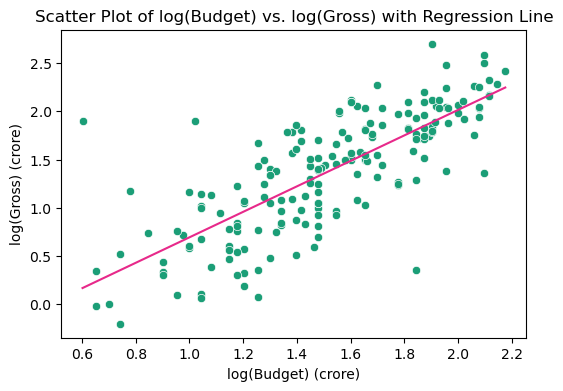

In [100]:
# Create scatter plot with regression line
plt.figure(figsize=(6, 4)) 

# Sort the data by Budget for smooth line plot
sorted_indices = np.argsort(np.log10(bollywood['Budget']))
sorted_budget = np.log10(bollywood['Budget'])[sorted_indices]
sorted_predicted = result.predict(X)[sorted_indices]

sns.scatterplot(x=np.log10(bollywood['Budget']), y=np.log10(bollywood['Gross']),  color='#1b9e77')
plt.xlabel('log(Budget) (crore)')
plt.ylabel('log(Gross) (crore)')
plt.title('Scatter Plot of log(Budget) vs. log(Gross) with Regression Line')

plt.plot(sorted_budget, sorted_predicted, color = '#e7298a')
plt.show()



In [102]:
np.log10(bollywood['Budget'])[sorted_indices]

156    0.602060
18     0.653213
5      0.653213
19     0.698970
21     0.740363
         ...   
180    2.113943
55     2.113943
44     2.113943
182    2.146128
43     2.176091
Name: Budget, Length: 190, dtype: float64

In [104]:
MedGPA = pd.read_csv('MedGPA.csv')

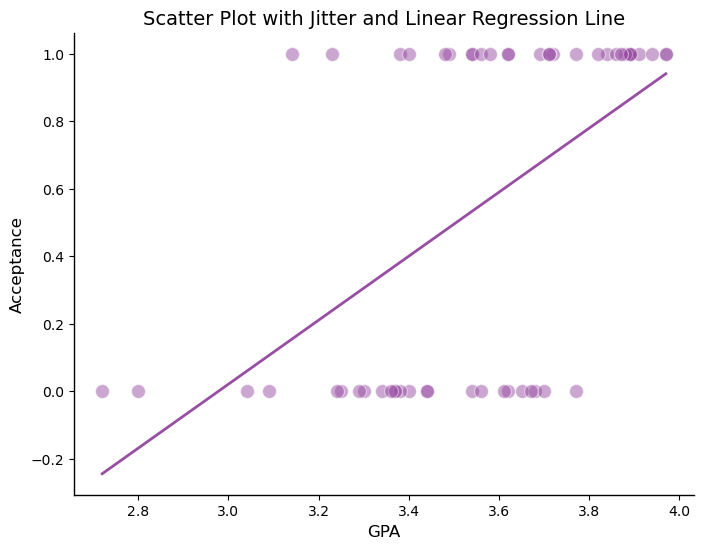

In [106]:
# Create scatter plot with jitter
fig, medgpa_plot = plt.subplots(figsize=(8,6) )
sns.scatterplot(x = 'GPA', y = 'Acceptance', data = MedGPA, color = "#984ea3", alpha = 0.5, s = 100)

# Add a linear regression line without confidence interval (se=False)
sns.regplot(x='GPA', y='Acceptance', data=MedGPA, scatter=False, color="#984ea3", ci = None, line_kws={'linewidth': 2})

# Customize plot background ( to make it transparent )
plt.gca().set_facecolor('none') # Transparent panel background
plt.gcf().set_facecolor('none') # Transparent plot backgrouund
plt.gca().spines['top'].set_visible(False) # Removing top spine
plt.gca().spines['right'].set_visible(False) # Removing right spine
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)

# Add labels
plt.xlabel('GPA', fontsize = 12)
plt.ylabel('Acceptance', fontsize = 12)
plt.title('Scatter Plot with Jitter and Linear Regression Line', fontsize = 14)

# Display plot
plt.show()

In [36]:
# Fit the model using the GLM family for logistic regression
X = sm.add_constant( MedGPA[['GPA']]  )
y = MedGPA['Acceptance'] 

In [38]:
med_lm = sm.GLM(y, X, family = sm.families.Gaussian() )
result = med_lm.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Acceptance   No. Observations:                   55
Model:                            GLM   Df Residuals:                       53
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                         0.18211
Method:                          IRLS   Log-Likelihood:                -30.187
Date:                Wed, 16 Oct 2024   Deviance:                       9.6519
Time:                        16:10:03   Pearson chi2:                     9.65
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3287
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8240      0.723     -3.908      0.0

In [40]:
# fitting this model using a binomial family
med_glm_bin = sm.GLM(y, X, family = sm.families.Binomial() )
result_gm_bin = med_glm_bin.fit()

In [42]:
print(result_gm_bin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Acceptance   No. Observations:                   55
Model:                            GLM   Df Residuals:                       53
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28.420
Date:                Wed, 16 Oct 2024   Deviance:                       56.839
Time:                        16:10:04   Pearson chi2:                     51.4
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2915
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.2065      5.629     -3.412      0.0

In [44]:
# Generate predicted values from the logistic regression model
GPA_range = np.linspace(MedGPA['GPA'].min(), MedGPA['GPA'].max(),100)
X_range = sm.add_constant(GPA_range) # Add constant for prediction 
predicted_acceptance = result_gm_bin.predict(X_range)

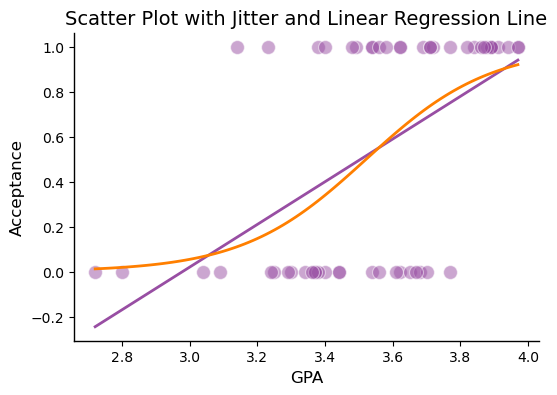

In [46]:
plt.figure(figsize=(6, 4)) 

sns.scatterplot(x = 'GPA', y = 'Acceptance', data = MedGPA, color = "#984ea3", alpha = 0.5, s = 100)

# Add a linear regression line without confidence interval (se=False)
sns.regplot(x='GPA', y='Acceptance', data=MedGPA, scatter=False, color="#984ea3", ci = None, line_kws={'linewidth': 2})

plt.plot(GPA_range, predicted_acceptance, color = '#ff7f00', linewidth = 2)

# Customize plot background ( to make it transparent )
plt.gca().set_facecolor('none') # Transparent panel background
plt.gcf().set_facecolor('none') # Transparent plot backgrouund
plt.gca().spines['top'].set_visible(False) # Removing top spine
plt.gca().spines['right'].set_visible(False) # Removing right spine
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)

# Add labels
plt.xlabel('GPA', fontsize = 12)
plt.ylabel('Acceptance', fontsize = 12)
plt.title('Scatter Plot with Jitter and Linear Regression Line', fontsize = 14)



# Display plot

plt.show()


In [70]:
# Create a new DataFrame with the values we want to predict
new_data = pd.DataFrame({'GPA': [2.5, 3, 4 ]})
# Add a constant term to the independent variables
X_new = sm.add_constant(new_data['GPA'])
print(result_gm_bin.predict(X_new))

In [72]:
print(new_data)

   GPA
0  2.5
1  3.0
2  4.0


In [80]:
vcov_matrix = result_gm_bin.cov_params()  # Access variance-covariance matrix
print(vcov_matrix)

           const       GPA
const  31.688201 -8.875445
GPA    -8.875445  2.494219


In [76]:
print(X_new)

   const  GPA
0    1.0  2.5
1    1.0  3.0
2    1.0  4.0


In [84]:
5.454-1.96*1.579

2.3591599999999997

In [86]:
5.454+1.96*1.579

8.54884